### <span style="color:orange">Task 1: Unique Cell</span>


Enter the reference number of month, between 1 (Jan) and 12 (Dec):ops
Please, only numbers allowed. Follow range suggested.
Please, inform a valid reference month
Enter the reference number of month, between 1 (Jan) and 12 (Dec):13
Please, inform a valid reference month
Enter the reference number of month, between 1 (Jan) and 12 (Dec):5


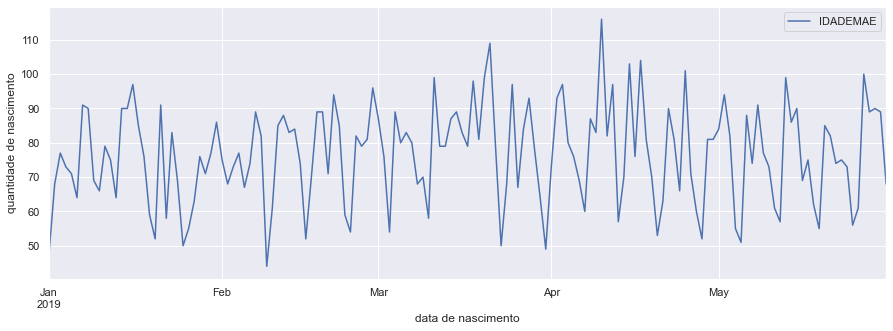

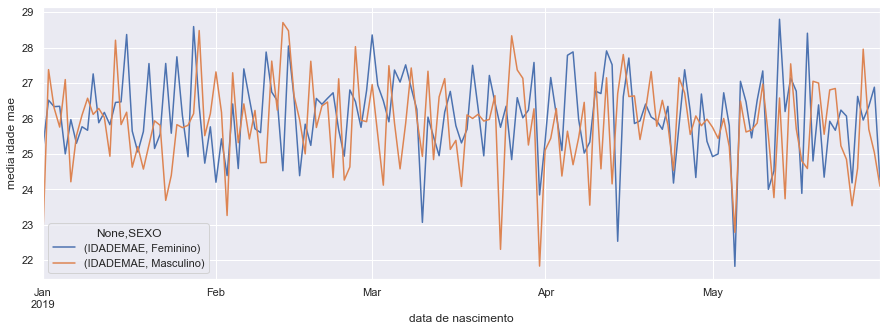

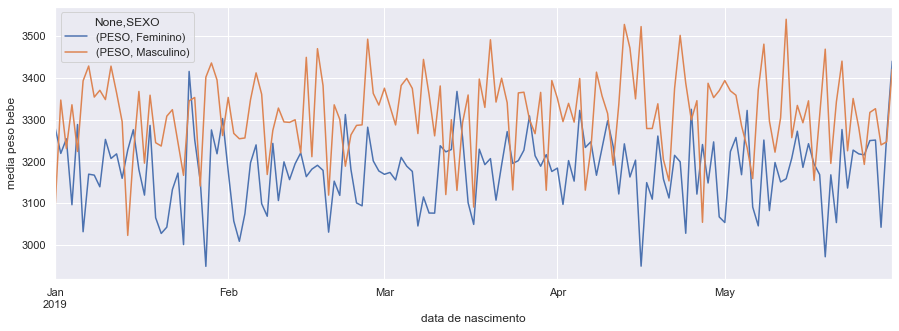

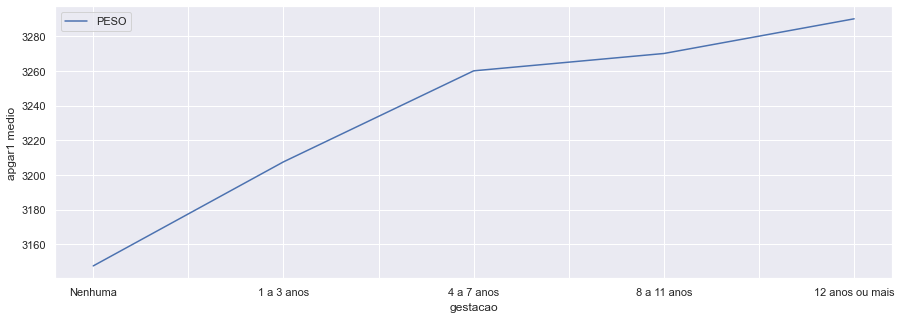

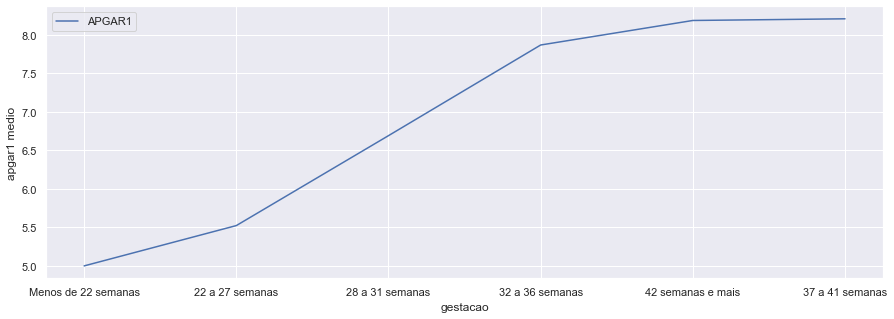

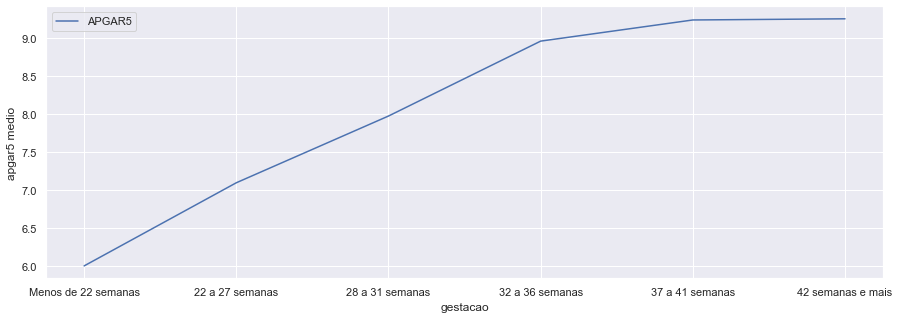

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os

sns.set_theme()  


# 2. Carregando o dataframe SINASC <a name="read"></a>
sinasc = pd.read_csv('SINASC_RO_2019.csv')
sinasc.head()

sinasc['DTNASC'] = pd.to_datetime(sinasc['DTNASC'])
sinasc['month'] = sinasc['DTNASC'].dt.month

check = sinasc['month'].max()

# 3. input the month reference
while True:
    try:
        monthReport = int(input('Enter the reference number of month, between 1 (Jan) and 12 (Dec):'))
    except:
        print('Please, only numbers allowed. Follow range suggested.')
    if (monthReport < 1 or monthReport > 12) or type(monthReport) == str:
        print('Please, inform a valid reference month')
    elif check < monthReport:
        print(f'Reference month {monthReport} is not available yet!')
    else:
        break

df_sinasc = sinasc.loc[sinasc['month'] <= monthReport]


# 4. Function
def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

# 5. Creating folder
max_data = str(df_sinasc.DTNASC.max())[:7]
os.makedirs('./output/'+max_data, exist_ok=True)


# 6. Charts
plota_pivot_table(df_sinasc, 'IDADEMAE', 'DTNASC', 'count', 'quantidade de nascimento','data de nascimento')
plt.savefig('./output/'+max_data+'/quantidade de nascimento.png')

plota_pivot_table(df_sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
plt.savefig('./output/'+max_data+'/media idade mae por sexo.png')

plota_pivot_table(df_sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
plt.savefig('./output/'+max_data+'/media peso bebe por sexo.png')

plota_pivot_table(df_sinasc, 'PESO', 'ESCMAE', 'median', 'apgar1 medio','gestacao','sort')
plt.savefig('./output/'+max_data+'/media apgar1 por escolaridade mae.png')

plota_pivot_table(df_sinasc, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
plt.savefig('./output/'+max_data+'/media apgar1 por gestacao.png')

plota_pivot_table(df_sinasc, 'APGAR5', 'GESTACAO', 'mean', 'apgar5 medio','gestacao','sort')
plt.savefig('./output/'+max_data+'/media apgar5 por gestacao.png')

### <span style="color:orange">Suggestion: input month reference</span>

<span style="color:blue">**Suggestion:** As suggestion, it's possible set a input to the users choice which month they want run the charts. In addiction, In addiction, the script check if the month reference is already populated and whether the input parameters is allowed. </span>